<h4>Import Libraries</h4>

In [2]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

from sklearn.preprocessing         import StandardScaler
from sklearn.datasets              import load_digits
from sklearn.ensemble              import RandomForestClassifier
from sklearn.metrics               import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection       import train_test_split, RandomizedSearchCV

<h5>Basic Parameters for Housekeeing</h5>

In [4]:
# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1,
          'scatter.edgecolors': 'b' # edge color of markers
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.2

<Figure size 1500x700 with 0 Axes>

<h4>Digits Dataset</h4>

In [6]:
digits = load_digits()

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
#split the data

X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    stratify = digits.target,
                                                    test_size = TEST_SIZE, random_state = RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [8]:
print(X_train.mean(), X_train.max(), X_train.min(), X_test.mean(), X_test.max(), X_test.min())

4.883350730688935 16.0 0.0 4.887413194444444 16.0 0.0


In [9]:
scaler = StandardScaler()

scaler.fit(X_train) # alwyas fit on train data

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


In [10]:
print(X_train.mean(), X_train.max(), X_train.min(), X_test.mean(), X_test.max(), X_test.min())

-6.953380112474884e-18 37.89459064299318 -2.9957679411411133 -0.0012848969409853287 15.44704883417374 -2.9957679411411133


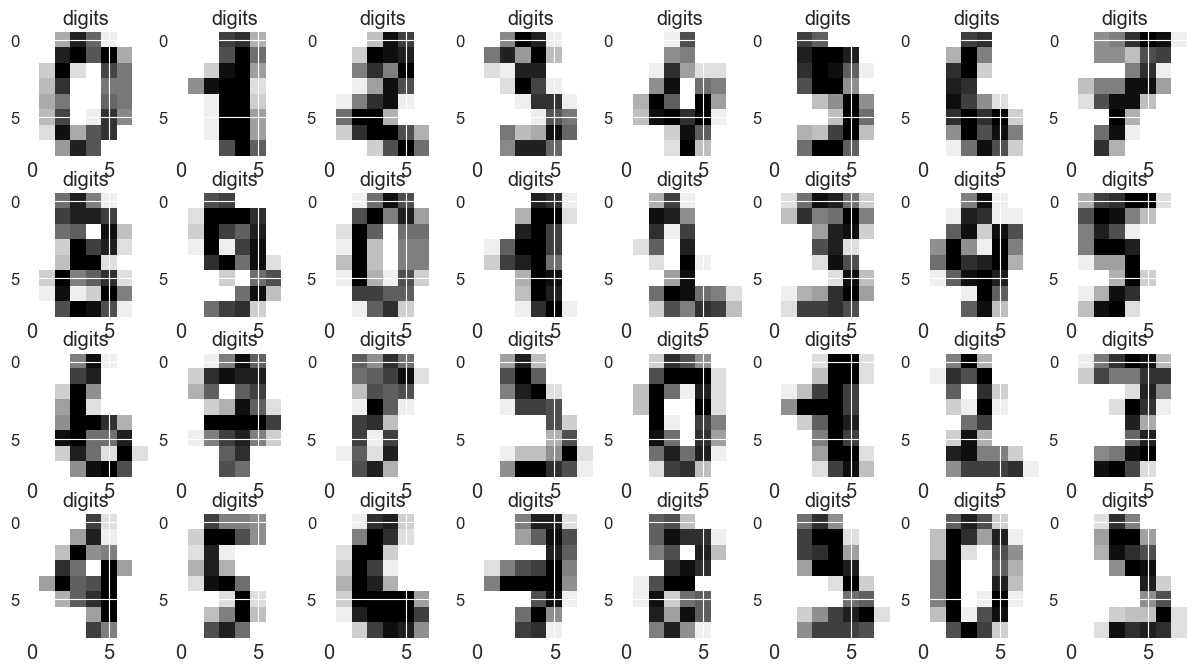

In [11]:
fig , axes = plt.subplots(4,8 , figsize= (15,8))

axes = axes.ravel()
for i in range(32):
    ax= axes[i]
    ax.imshow(digits.images[i], cmap =plt.cm.binary)
    ax.set_title('digits')


In [12]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc= accuracy_score(y_test, y_pred)

acc

0.9805555555555555

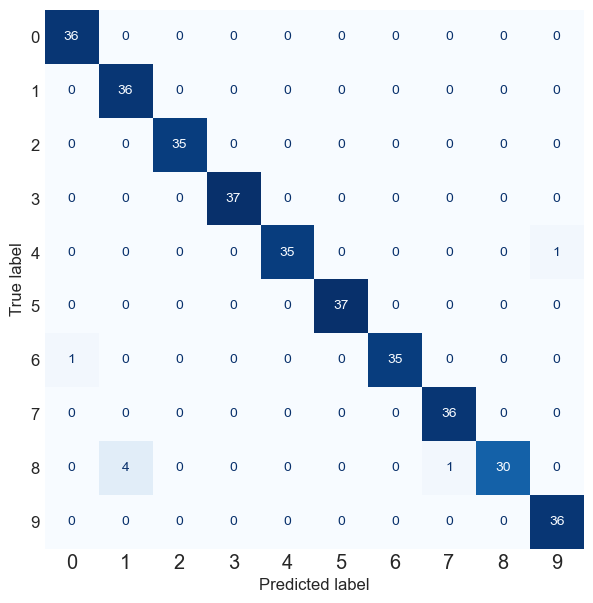

In [13]:
cm = confusion_matrix(y_true = y_test, y_pred=y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=digits.target_names)
disp.plot(cmap= plt.cm.Blues, colorbar=False)
plt.grid(False)
plt.show()

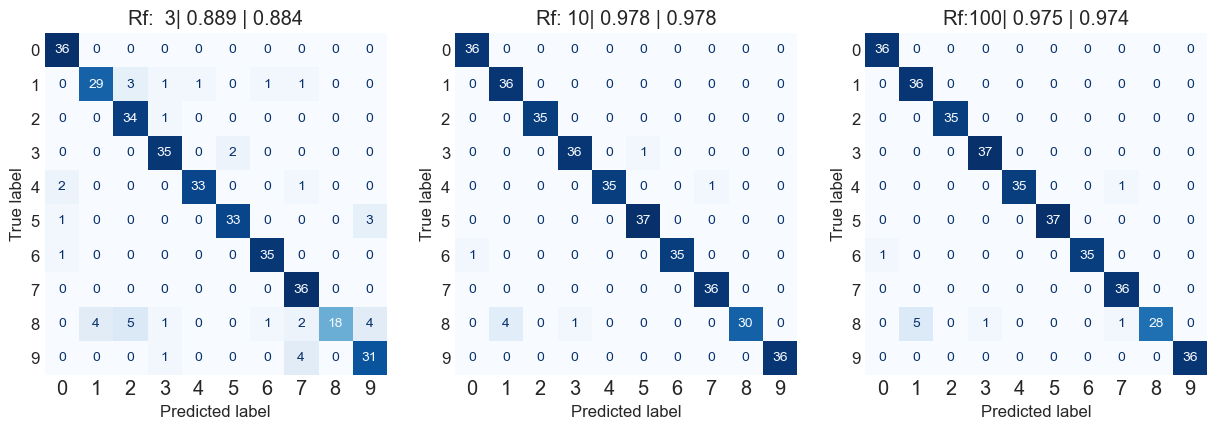

<Figure size 1500x700 with 0 Axes>

In [14]:
fig, axes = plt.subplots(1,3)

for i, max_depth in enumerate([3,10,100]):

    clf = RandomForestClassifier(max_depth=max_depth)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    acc= accuracy_score(y_test, y_pred)

    f1score = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')

    cm = confusion_matrix(y_true = y_test, y_pred=y_pred)
    
    disp= ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=digits.target_names)
    
    disp.plot(ax = axes[i], cmap= plt.cm.Blues, colorbar=False)
    
    axes[i].grid(False)

    axes[i].set_title(f'Rf:{max_depth:3d}|{acc : 0.3f} |{f1score : 0.3f}')
    
plt.show()
plt.tight_layout()

<h4>Randomized Grid Search</h4>

In [30]:
params = {
    'n_estimators'     : [100, 500, 1000],  #number of weak Trees
    'max_depth'        : [None, 8, 10, 15], #max_depth, we saw 10 was best
    'min_samples_split' : [2, 5, 10], 
    'min_samples_leaf'  : [1, 2],
    'max_features'     : ['sqrt', 'log2', None]
    
}

rf = RandomForestClassifier(n_jobs=16)

clf = RandomizedSearchCV(estimator=rf, 
                         param_distributions=params, 
                         scoring='accuracy', 
                         n_iter=10, 
                         verbose=1)

clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
0.9763429152148664


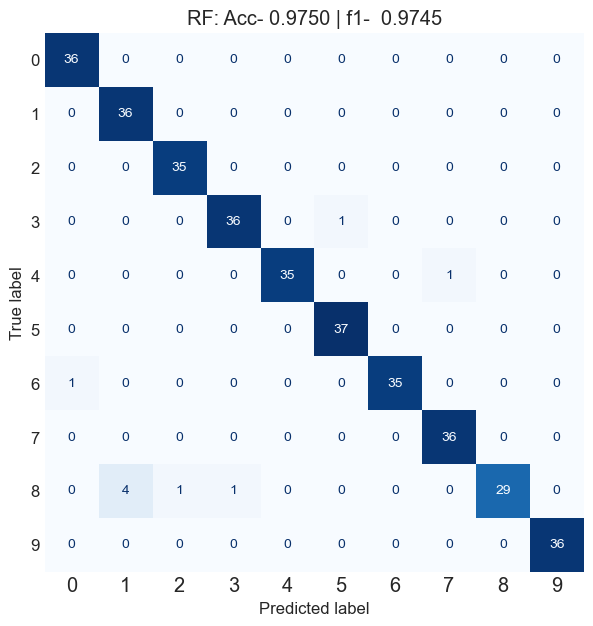

In [32]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

f1score= f1_score(y_true=y_test,  y_pred=y_pred, average='weighted')

cm= confusion_matrix(y_true=y_test, y_pred=y_pred)

disp= ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=digits.target_names)

disp.plot(cmap= plt.cm.Blues, colorbar=False)

plt.title(f'RF: Acc- {acc:0.4f} | f1- {f1score: 0.4f}')
plt.grid(False)
plt.show()
